<a href="https://colab.research.google.com/github/zsj-jaz/Capstone-G4-ReelGood/blob/main/code/eda/%5BG4_ReelGood_Jaz%5DEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import kagglehub
import shutil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


In [ ]:
dataset_path = '/content/drive/MyDrive/datasets/the-movies-dataset'
meta_df = pd.read_csv(dataset_path+'/cleaned_metadata.csv')


meta_df.head()

,id,title,year,genres,first_three_actors,director,original_language,imdb_id
0,862,Toy Story,1995,"Animation, Comedy, Family","Tom Hanks, Tim Allen, Don Rickles",John Lasseter,en,tt0114709
1,8844,Jumanji,1995,"Adventure, Fantasy, Family","Robin Williams, Jonathan Hyde, Kirsten Dunst",Joe Johnston,en,tt0113497
2,15602,Grumpier Old Men,1995,"Romance, Comedy","Walter Matthau, Jack Lemmon, Ann-Margret",Howard Deutch,en,tt0113228
3,31357,Waiting to Exhale,1995,"Comedy, Drama, Romance","Whitney Houston, Angela Bassett, Loretta Devine",Forest Whitaker,en,tt0114885
4,11862,Father of the Bride Part II,1995,Comedy,"Steve Martin, Diane Keaton, Martin Short",Charles Shyer,en,tt0113041


In [ ]:
train_df = pd.read_csv(dataset_path+'/train_ratings.csv')
train_df.head()

,userId,movieId,rating,timestamp
0,4,4896,4.0,1042667845
1,4,415,4.0,1042667925
2,4,2023,5.0,1042667945
3,4,3004,1.0,1042668521
4,4,2694,1.0,1042668544


In [ ]:
df = train_df.merge(meta_df, left_on='movieId', right_on='id', how='left')
df.head()

,userId,movieId,rating,timestamp,id,title,year,genres,first_three_actors,director,original_language,imdb_id
0,4,4896,4.0,1042667845,4896,Muxmäuschenstill,2004,"Comedy, Drama","Jan Henrik Stahlberg, Fritz Roth, Wanda Perdel...",Marcus Mittermeier,de,tt0396746
1,4,415,4.0,1042667925,415,Batman & Robin,1997,"Action, Crime, Fantasy","George Clooney, Chris O'Donnell, Arnold Schwar...",Joel Schumacher,en,tt0118688
2,4,2023,5.0,1042667945,2023,Hidalgo,2004,"Western, Adventure","Viggo Mortensen, Zuleikha Robinson, Omar Sharif",Joe Johnston,en,tt0317648
3,4,3004,1.0,1042668521,3004,Twelve Plus One,1969,Comedy,"Sharon Tate, Vittorio Gassman, Orson Welles",Nicolas Gessner,en,tt0065361
4,4,2694,1.0,1042668544,2694,Tuya's Marriage,2006,"Drama, Romance, Foreign","Nan Yu, Bater, Sen'ge",Wang Quan'an,zh,tt0949564


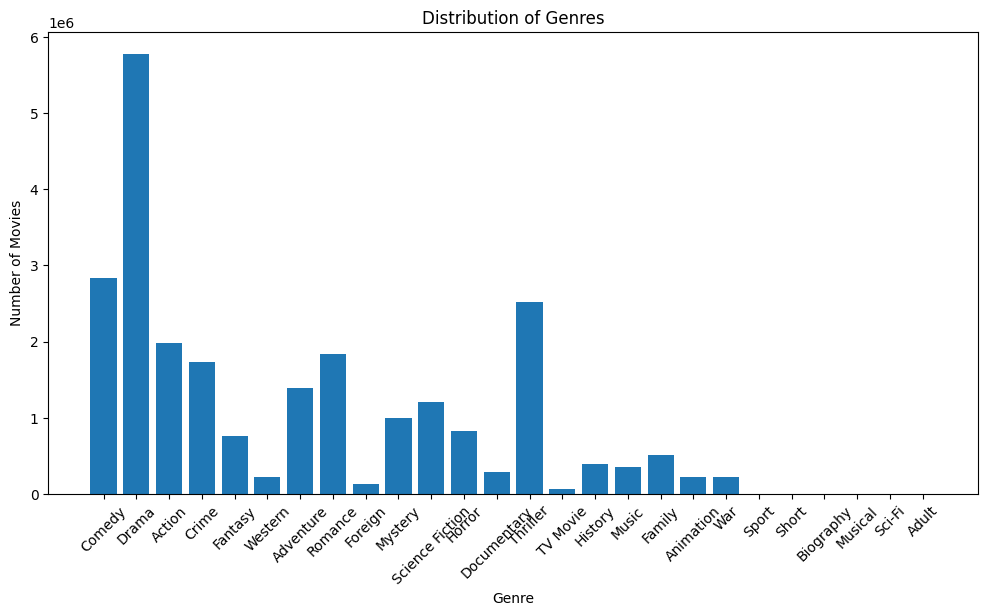

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt

genre_counts = Counter([g for sublist in df['genres'].dropna().str.split(', ') for g in sublist])
plt.figure(figsize=(12, 6))
plt.bar(genre_counts.keys(), genre_counts.values())
plt.xticks(rotation=45)
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.title('Distribution of Genres')
plt.show()


In [ ]:
random_users = df['userId'].sample(5, random_state=68).values
print(random_users)

[ 49221 113628  86066 110752 254977]


In [ ]:

# Define a function to generate word clouds
def plot_wordcloud(user_prefs, user_ids, column, title):
    fig, axes = plt.subplots(1, len(user_ids), figsize=(20, 5))

    for i, user_id in enumerate(user_ids):
        user_data = user_prefs[user_prefs['userId'] == user_id]
        data_dict = dict(zip(user_data[column], user_data['rating']))

        wordcloud = WordCloud(width=400, height=400, background_color="white", colormap="viridis").generate_from_frequencies(data_dict)

        axes[i].imshow(wordcloud, interpolation="bilinear")
        axes[i].axis("off")
        axes[i].set_title(f'User {user_id}', fontsize=12)

    plt.suptitle(title, fontsize=14)
    plt.tight_layout()
    plt.show()

# User Genre Preferences Analysis
- **Larger words** mean the user **rates that genre higher**.

## Users Have Unique Tastes
- Each user has their own movie preferences.
- Example:
  - **User 113628** likes **TV Movie, Western, and Mystery**.
  - **User 254977** prefers **Short, Crime, and Horror**.

## Commonly Liked Genres
- **History, Mystery, Documentary, and Crime** appear for multiple users.
- These genres **receive high ratings overall** in the dataset.


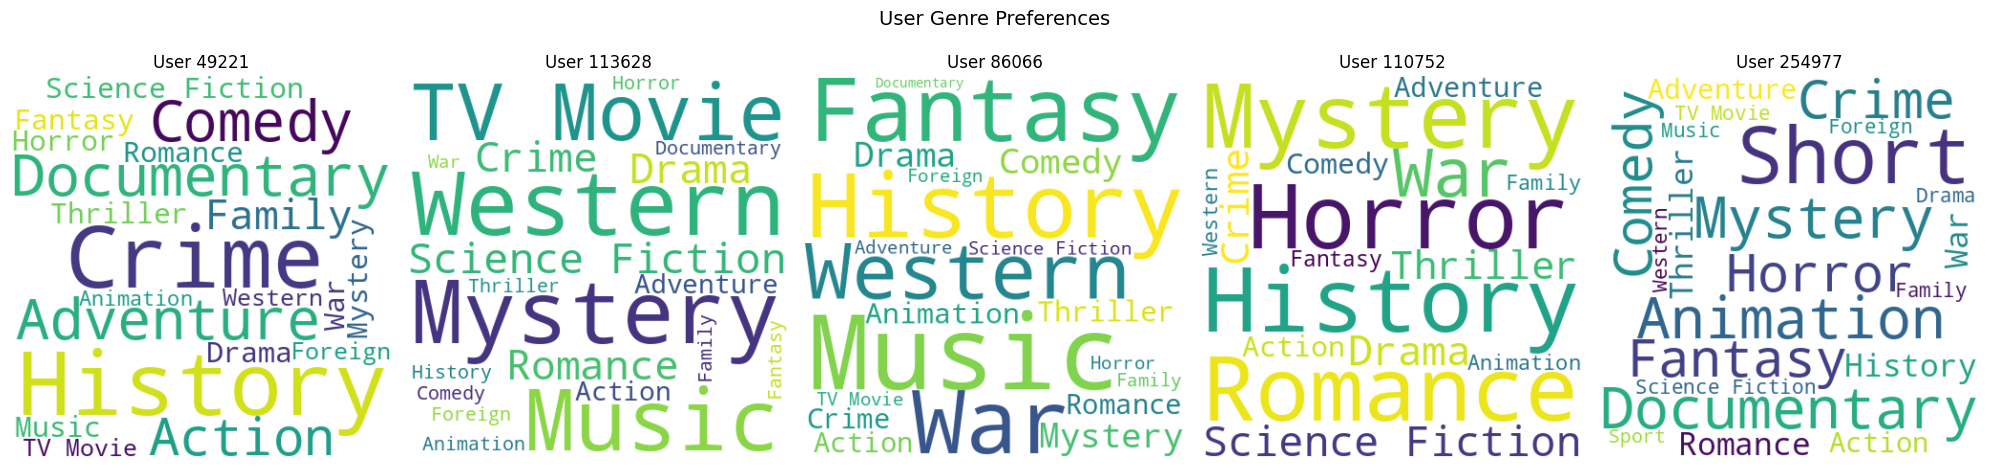

In [ ]:
genre_ratings = df[['userId', 'genres', 'rating']].dropna()
genre_ratings = genre_ratings.assign(genres=genre_ratings['genres'].str.split(', ')).explode('genres')
user_genre_prefs = genre_ratings.groupby(['userId', 'genres'])['rating'].mean().reset_index()
plot_wordcloud(user_genre_prefs, random_users, 'genres', "User Genre Preferences")

# User Actor Preferences Analysis
- **Larger names** indicate actors that the user **rates highly**.

## Users Have Different Favorite Actors
- Each user prefers different actors, reflecting their movie choices.
- Example:
  - **User 49221** likes **Al Pacino, Arthur Kennedy, and Claude Akins**.
  - **User 86066** prefers **Aaliyah, Alec Baldwin, and Carmen Maura**.

## Popular Actors Across Users
- Some names appear in multiple word clouds, like **Bill Pullman, Arnold Schwarzenegger, and Charlotte Gainsbourg**.
- These actors may be **highly rated by many users** in the dataset.

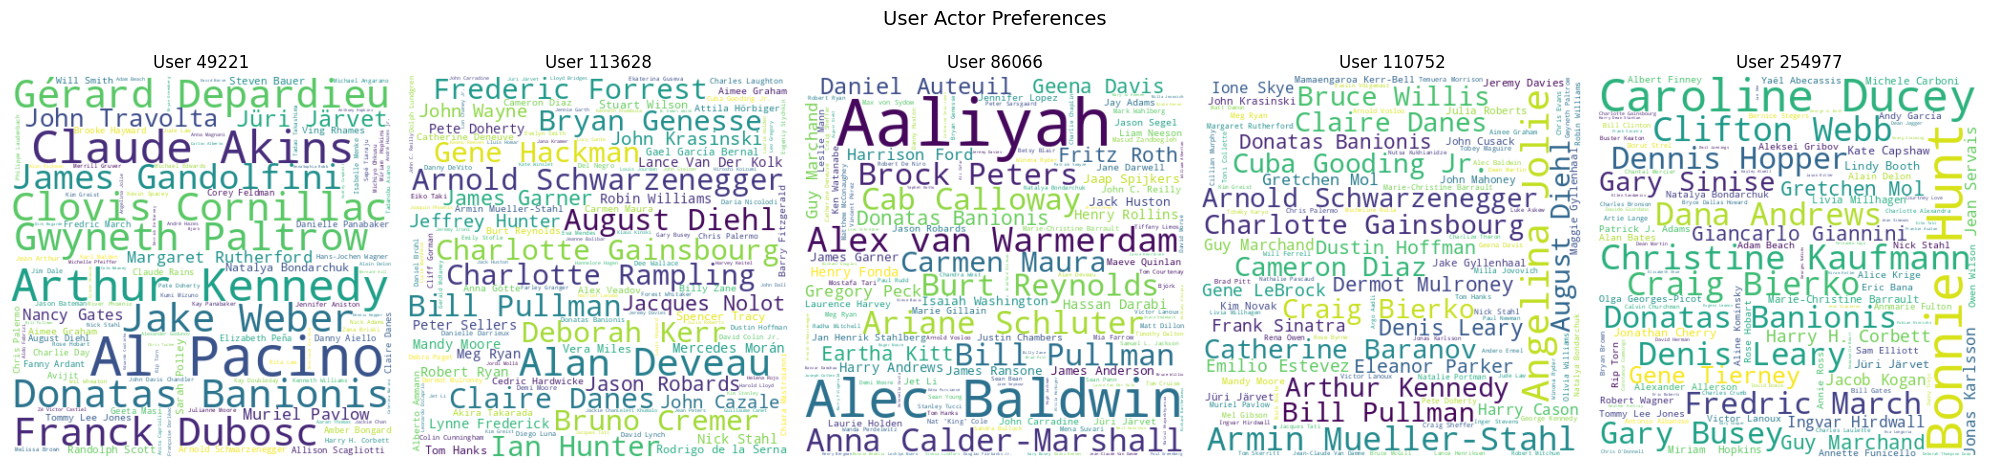

In [ ]:
df['first_three_actors'] = df['first_three_actors'].fillna('')
actor_ratings = df[['userId', 'first_three_actors', 'rating']].dropna()
actor_ratings = actor_ratings.assign(first_three_actors=actor_ratings['first_three_actors'].str.split(', ')).explode('first_three_actors')
user_actor_prefs = actor_ratings.groupby(['userId', 'first_three_actors'])['rating'].mean().reset_index()
plot_wordcloud(user_actor_prefs, random_users, 'first_three_actors', "User Actor Preferences")

# User Director Preferences Analysis
- **Larger names** indicate directors the user **rates highly**.

## Users Have Different Favorite Directors
- Each user prefers different directors, showing their unique movie tastes.
- Example:
  - **User 49221** enjoys **Andrei Tarkovsky, Todd Robinson, and Zack Snyder**.
  - **User 86066** prefers **Abbas Kiarostami, Adam Shankman, and Edward Zwick**.

## Popular Directors Across Users
- Some directors appear in multiple word clouds, such as **Andrei Tarkovsky, Barry Sonnenfeld, and George Pollock**.
- These directors may be **highly rated by many users** in the dataset.


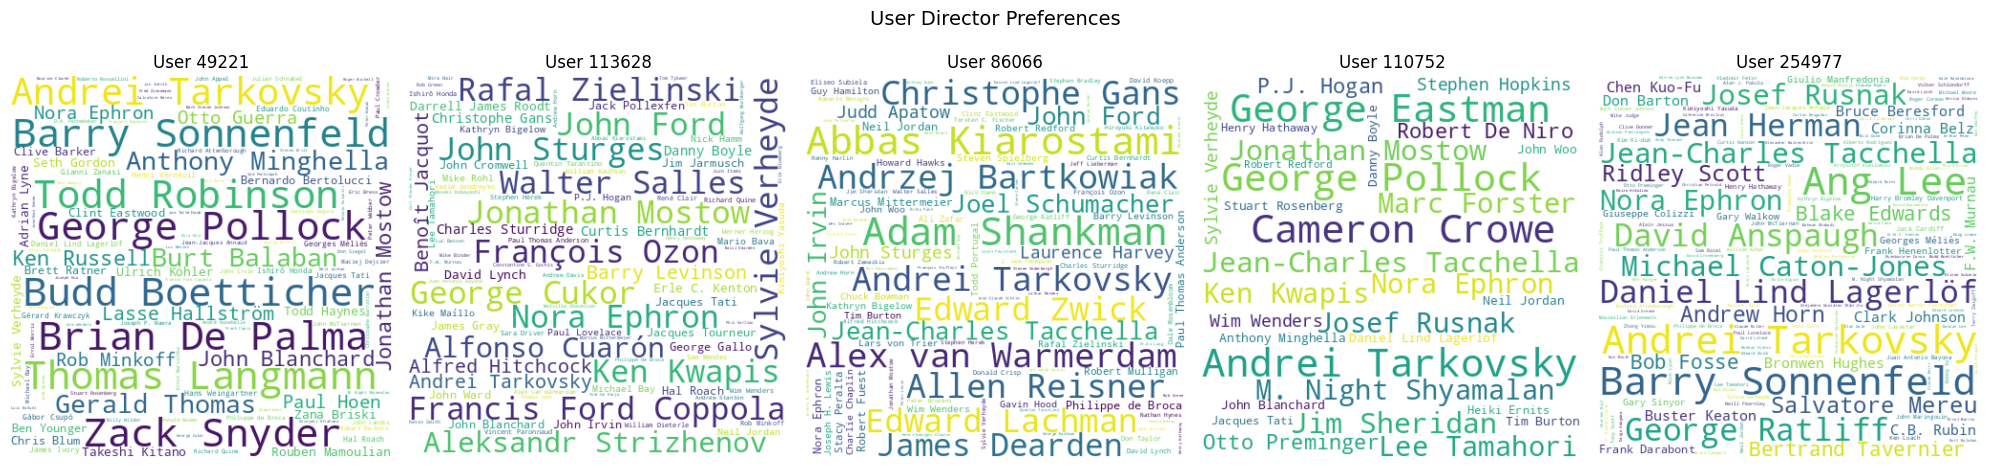

In [ ]:
df['director'] = df['director'].fillna('')
director_ratings = df[['userId', 'director', 'rating']].dropna()
user_director_prefs = director_ratings.groupby(['userId', 'director'])['rating'].mean().reset_index()
plot_wordcloud(user_director_prefs, random_users, 'director', "User Director Preferences")

# User Language Preferences Analysis
- **Larger letters** indicate languages where the user **gives higher ratings**.
## Users Prefer Movies in Specific Languages
- Each user tends to rate movies in certain languages more highly.
- This may reflect their **spoken language** or **interest in foreign films**.
- Example:
  - **User 113628** prefers movies in **Spanish (es), German (de), and French (fr)**.
  - **User 254977** highly rates **Chinese (zh), Korean (ko), and Hungarian (hu)** films.

## Popular Language Across Users
- Common preferences like **English (en), Spanish (es), and French (fr)** suggest widely watched languages.


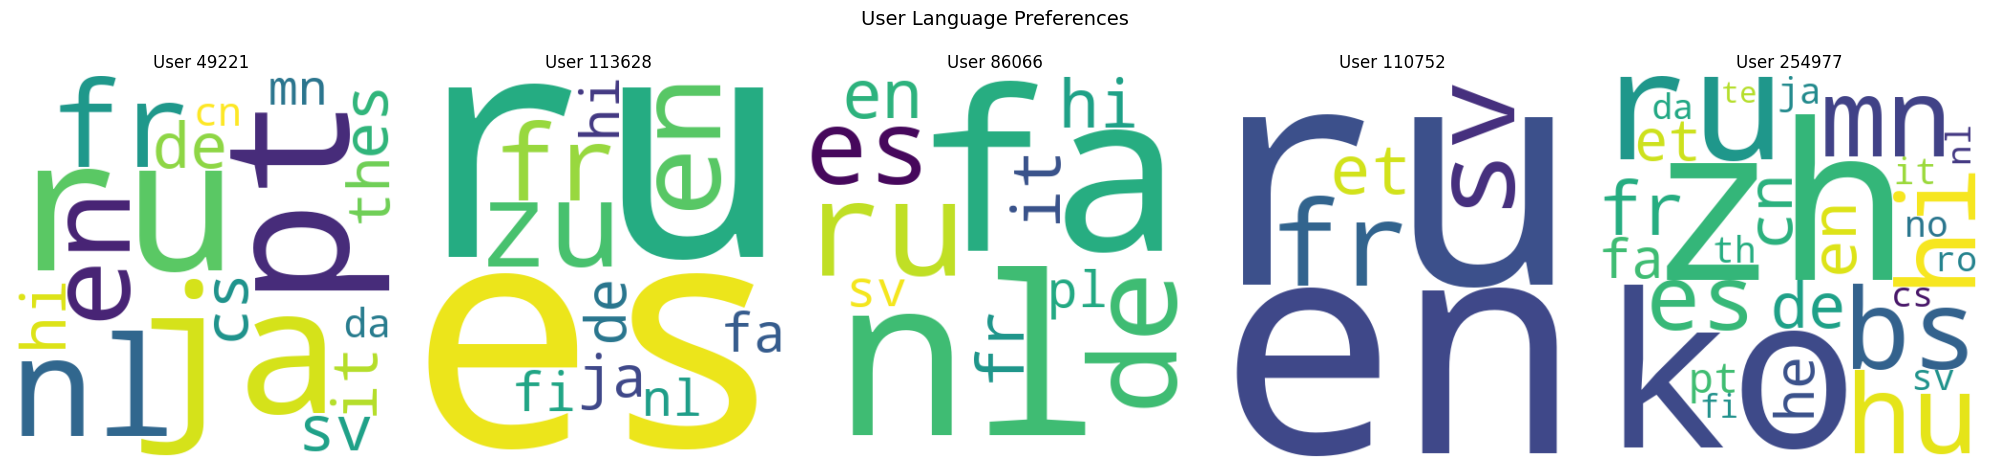

In [ ]:
lang_ratings = df[['userId', 'original_language', 'rating']].dropna()
user_lang_prefs = lang_ratings.groupby(['userId','original_language'])['rating'].mean().reset_index()
plot_wordcloud(user_lang_prefs, random_users, 'original_language', "User Language Preferences")

# User Preferences Over Decades
## Differences in Preferences
- **User 254977 (purple)** rates **very old films (pre-1920s) highly**, but ratings decline for later decades.
- **User 86066 (green)** rates movies from **1960s onward more favorably**, with a steady increase.
- **User 113628 (orange)** has fluctuating preferences, showing **no clear bias for any decade**.

## Insights and Potential Applications
- Some users may prefer **older classic films**, while others enjoy **modern releases**.
- This could help **recommendations** by factoring in **decade preferences**.

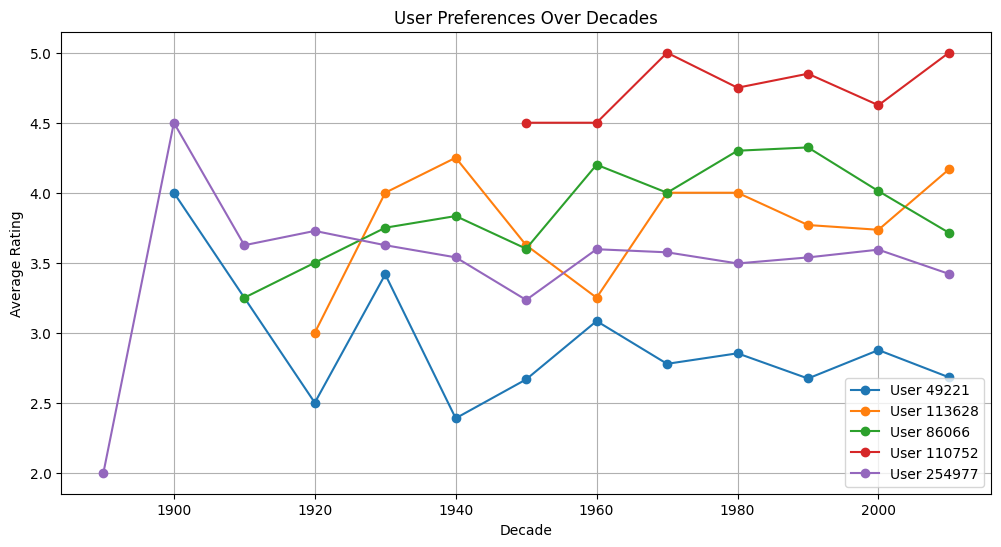

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is already loaded and contains 'userId', 'year', and 'rating'

# Convert year to numeric, dropping rows where year is missing
df = df.dropna(subset=['year'])
df['year'] = df['year'].astype(int)

# Create decade column
df['decade'] = (df['year'] // 10) * 10

# Compute user preferences by year and decade
user_year_prefs = df.groupby(['userId', 'year'])['rating'].mean().reset_index()
user_decade_prefs = df.groupby(['userId', 'decade'])['rating'].mean().reset_index()

# Plot user preferences over decades
plt.figure(figsize=(12, 6))
for user_id in random_users:
    user_data = user_decade_prefs[user_decade_prefs['userId'] == user_id]
    plt.plot(user_data['decade'], user_data['rating'], marker='o', label=f'User {user_id}')

plt.xlabel("Decade")
plt.ylabel("Average Rating")
plt.title("User Preferences Over Decades")
plt.legend()
plt.grid(True)
plt.show()




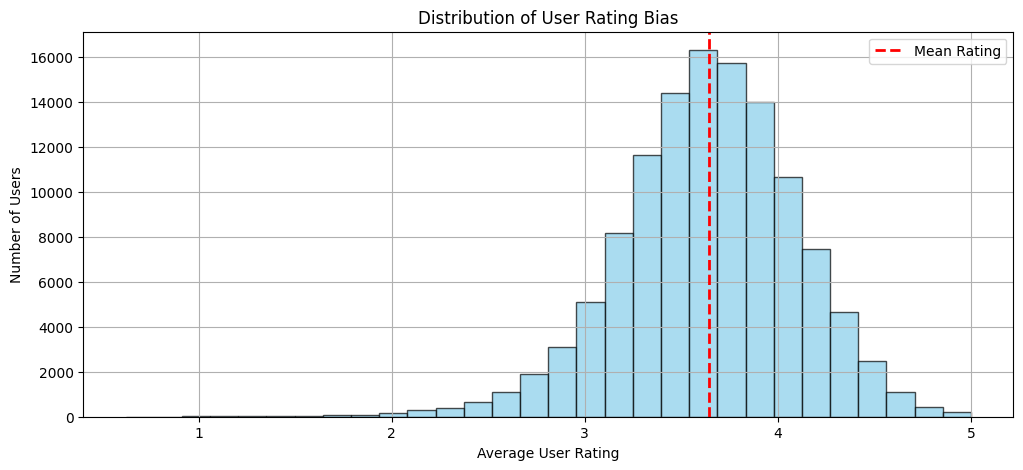

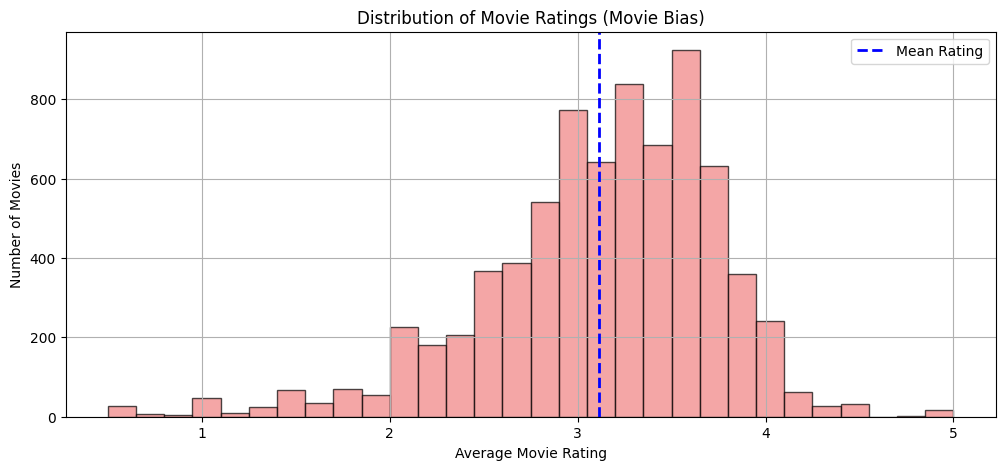

In [ ]:
# Compute user bias (average rating per user)
user_bias = train_df.groupby('userId')['rating'].mean().reset_index()
user_bias.columns = ['userId', 'avg_user_rating']

# Compute movie bias (average rating per movie)
movie_bias = train_df.groupby('movieId')['rating'].mean().reset_index()
movie_bias.columns = ['movieId', 'avg_movie_rating']

# Plot distribution of user ratings (User Bias)
plt.figure(figsize=(12, 5))
plt.hist(user_bias['avg_user_rating'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(user_bias['avg_user_rating'].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean Rating')
plt.xlabel("Average User Rating")
plt.ylabel("Number of Users")
plt.title("Distribution of User Rating Bias")
plt.legend()
plt.grid(True)
plt.show()

# Plot distribution of movie ratings (Movie Bias)
plt.figure(figsize=(12, 5))
plt.hist(movie_bias['avg_movie_rating'], bins=30, color='lightcoral', edgecolor='black', alpha=0.7)
plt.axvline(movie_bias['avg_movie_rating'].mean(), color='blue', linestyle='dashed', linewidth=2, label='Mean Rating')
plt.xlabel("Average Movie Rating")
plt.ylabel("Number of Movies")
plt.title("Distribution of Movie Ratings (Movie Bias)")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Identify generous and strict users
generous_users = user_bias[user_bias['avg_user_rating'] >= 4.5]
strict_users = user_bias[user_bias['avg_user_rating'] <= 2.5]

# Identify universally liked and disliked movies
liked_movies = movie_bias[movie_bias['avg_movie_rating'] >= 4.5]
disliked_movies = movie_bias[movie_bias['avg_movie_rating'] <= 2.5]

# Compare user bias & movie bias
# Do generous users rate poorly rated movies higher?
generous_user_ratings = df[df['userId'].isin(generous_users['userId'])]
strict_user_ratings = df[df['userId'].isin(strict_users['userId'])]

# Average ratings given by generous users to disliked movies
generous_users_on_disliked = generous_user_ratings[generous_user_ratings['movieId'].isin(disliked_movies['movieId'])]
generous_users_disliked_avg = generous_users_on_disliked['rating'].mean()

# Average ratings given by strict users to liked movies
strict_users_on_liked = strict_user_ratings[strict_user_ratings['movieId'].isin(liked_movies['movieId'])]
strict_users_liked_avg = strict_users_on_liked['rating'].mean()

# Display results
analysis_results = {
    "Number of Generous Users (avg >= 4.5)": len(generous_users),
    "Number of Strict Users (avg <= 2.5)": len(strict_users),
    "Number of Universally Liked Movies (avg >= 4.5)": len(liked_movies),
    "Number of Universally Disliked Movies (avg <= 2.5)": len(disliked_movies),
    "Avg Rating by Generous Users to Disliked Movies": generous_users_disliked_avg,
    "Avg Rating by Strict Users to Liked Movies": strict_users_liked_avg,
}

print("Analysis Results:")
for key, value in analysis_results.items():
    print(f"{key}: {value}")

Analysis Results:
Number of Generous Users (avg >= 4.5): 2738
Number of Strict Users (avg <= 2.5): 1661
Number of Universally Liked Movies (avg >= 4.5): 47
Number of Universally Disliked Movies (avg <= 2.5): 1181
Avg Rating by Generous Users to Disliked Movies: 4.176566579634465
Avg Rating by Strict Users to Liked Movies: nan


Time-based Trend

In [ ]:
import pandas as pd

# Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')

# Compute first and last rating date per user
user_stats = (
    df.groupby('userId')['timestamp']
    .agg(['min', 'max', 'count'])
    .reset_index()
)

# Compute rating span in years
user_stats['span_years'] = (user_stats['max'] - user_stats['min']).dt.days / 365.25

# Compute average ratings per year
user_stats['ratings_per_year'] = user_stats['count'] / user_stats['span_years']

# **Set thresholds**
min_years = 5       # Minimum active span
min_ratings_per_year = 30  # Must have at least 10 ratings per year on average

# Apply filters
long_term_active_users = user_stats[
    (user_stats['span_years'] >= min_years) &
    (user_stats['ratings_per_year'] >= min_ratings_per_year)
]['userId'].values




In [ ]:
# Randomly sample 5 users from this refined list
random_users_for_time_trend = pd.Series(long_term_active_users).sample(5, random_state=68).values

print(random_users_for_time_trend)

[250666 243514 137180  10086 209561]


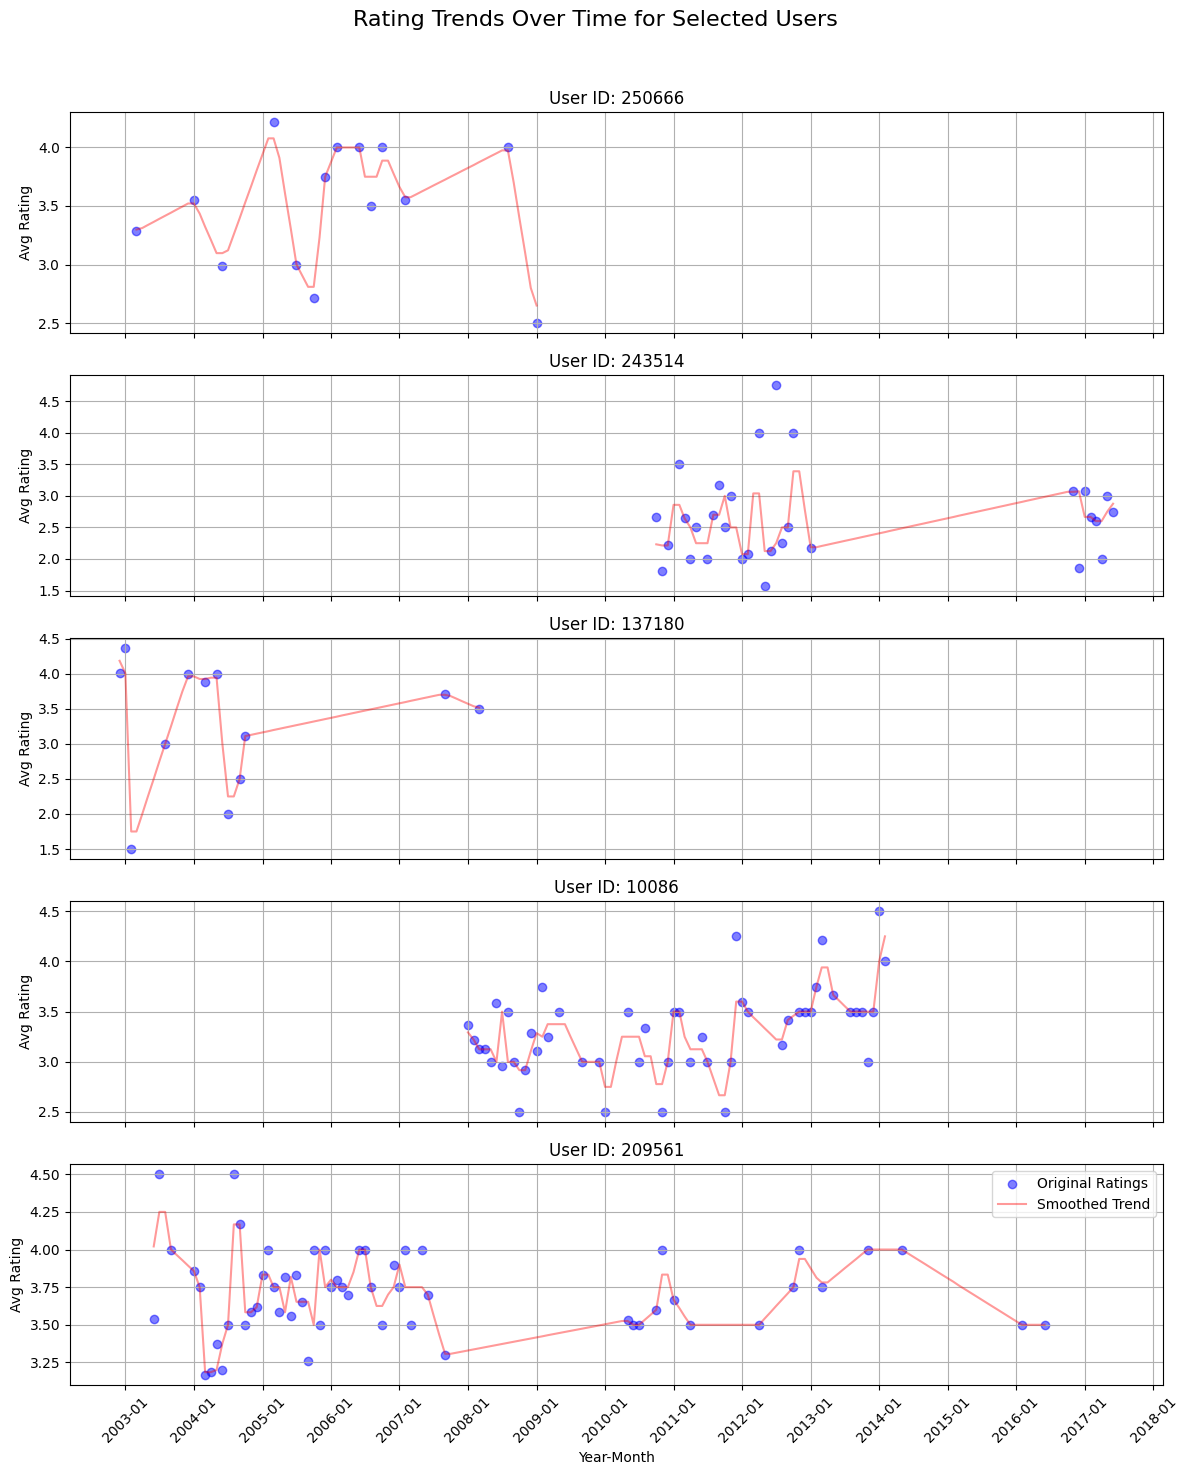

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


# Create subplots: 5 rows, 1 column (example: len(random_users)=5)
fig, axs = plt.subplots(len(random_users_for_time_trend), 1, figsize=(12, 15), sharex=True)
fig.suptitle("Rating Trends Over Time for Selected Users", fontsize=16)

for i, user_id in enumerate(random_users_for_time_trend):
    # Filter the DataFrame for the selected user and make a copy
    user_data = df[df['userId'] == user_id].copy()

    # Convert 'timestamp' to datetime
    user_data['timestamp'] = pd.to_datetime(user_data['timestamp'], unit='s')

    # Extract the year and month (as a Period)
    user_data['year_month'] = user_data['timestamp'].dt.to_period('M')

    # Calculate the monthly average rating
    monthly_avg_ratings = (
        user_data
        .groupby('year_month')['rating']
        .mean()
        .reset_index()
    )

    # Build a complete monthly index from min to max
    all_months = pd.period_range(
        start=monthly_avg_ratings['year_month'].min(),
        end=monthly_avg_ratings['year_month'].max(),
        freq='M'
    )

    # Reindex to ensure all months are present
    monthly_avg_ratings = (
        monthly_avg_ratings
        .set_index('year_month')
        .reindex(all_months)
        .reset_index()
    )
    monthly_avg_ratings.rename(columns={'index': 'year_month'}, inplace=True)

    # Interpolate missing monthly ratings
    monthly_avg_ratings['inter_rating'] = monthly_avg_ratings['rating'].interpolate()

    # Ensure chronological order just in case
    monthly_avg_ratings.sort_values('year_month', inplace=True)

    # Convert the Period to a Timestamp (start of each month) for real date axis
    monthly_avg_ratings['date'] = monthly_avg_ratings['year_month'].dt.to_timestamp()

    # Apply a rolling median (3-month window). Adjust window size to taste.
    monthly_avg_ratings['rating_smooth'] = (
        monthly_avg_ratings['inter_rating']
        .rolling(window=3, min_periods=1, center=True)
        .median()
    )

    # Scatter plot of original monthly averages
    axs[i].scatter(
        monthly_avg_ratings['date'],
        monthly_avg_ratings['rating'],
        color='blue', alpha=0.5,
        label="Original Ratings"
    )

    # Line plot of the rolling-median “smoothed” ratings
    axs[i].plot(
        monthly_avg_ratings['date'],
        monthly_avg_ratings['rating_smooth'],
        linestyle='-',
        color='red', label="Smoothed Trend", alpha=0.4
    )

    axs[i].set_title(f"User ID: {user_id}")
    axs[i].set_ylabel("Avg Rating")
    axs[i].grid(True)

    # Format the x-axis to display dates nicely
    axs[i].xaxis.set_major_locator(mdates.YearLocator())  # major ticks each year
    axs[i].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # format ticks as YYYY-MM

    # Rotate ticks only on the last subplot
    if i == len(random_users) - 1:
        plt.xticks(rotation=45)
    else:
        axs[i].set_xticklabels([])

# Common x-label
plt.xlabel("Year-Month")
plt.legend()
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust to leave space for main title
plt.show()
